- Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

- Transformar a variables cíclicas las variables DepTime, etc.
- No imputar por 0 a la hora de limpiar null values porque me destarota todas las variables cíclicas
- tratar outliers (log/sqrt)
- Por qué se generan nuevos null values al eliminar las rows de cancelled y diverted??? Porque no elimino los indices sino que dejo las filas pero sin los valores...

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
#import warnings
#warnings.filterwarnings('ignore')

In [212]:
#delayed_flights = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\DelayedFlights.csv', sep=',')
delayed_flights = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\DelayedFlights.csv', sep=',')

delayed_flights

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [213]:
delayed_flights.drop(columns='Unnamed: 0', inplace=True)

Abans que res, eliminarem la variable Year ja que tots els vols del dataset son del 2008 i ens sembla redundant.

In [214]:
delayed_flights.drop(columns='Year', inplace=True)

A continuació, farem neteja de valors nuls.

Observem que els vols cancelats produeixen una gran quantitat de null values a diferents variables. Pensem que lo millor serà eliminar les files, ja que el nombre de vols cancelats és petit.

In [215]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [217]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                 0.032683
DayofMonth            0.032683
DayOfWeek             0.032683
DepTime               0.032683
CRSDepTime            0.032683
ArrTime               0.367108
CRSArrTime            0.032683
UniqueCarrier         0.032683
FlightNum             0.032683
TailNum               0.032942
ActualElapsedTime     0.433043
CRSElapsedTime        0.042907
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.032683
Origin                0.032683
Dest                  0.032683
Distance              0.032683
TaxiIn                0.367108
TaxiOut               0.032683
Cancelled             0.032683
CancellationCode      0.032683
Diverted              0.032683
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [198]:
delayed_flights[delayed_flights.Cancelled == 1].isna().sum() / len(delayed_flights[delayed_flights.Cancelled == 1]) * 100

Month                  0.000000
DayofMonth             0.000000
DayOfWeek              0.000000
DepTime                0.000000
CRSDepTime             0.000000
ArrTime              100.000000
CRSArrTime             0.000000
UniqueCarrier          0.000000
FlightNum              0.000000
TailNum                0.000000
ActualElapsedTime    100.000000
CRSElapsedTime         0.000000
AirTime              100.000000
ArrDelay             100.000000
DepDelay               0.000000
Origin                 0.000000
Dest                   0.000000
Distance               0.000000
TaxiIn               100.000000
TaxiOut               71.879937
Cancelled              0.000000
CancellationCode       0.000000
Diverted               0.000000
CarrierDelay         100.000000
WeatherDelay         100.000000
NASDelay             100.000000
SecurityDelay        100.000000
LateAircraftDelay    100.000000
dtype: float64

In [216]:
delayed_flights[delayed_flights.Cancelled == 1] = delayed_flights[delayed_flights.Cancelled == 1].dropna()

Hem eliminat tots els vols cancelats, per tant, la variable Cancelled ja no ens aporta cap informació. Per aquest motiu, l'eliminem.

In [200]:
delayed_flights.drop(columns='Cancelled', inplace=True)

Sembla que els null values de les variables CarrierDelay, WeatherDelay, etc. están relacionats amb ArrDelay, és a dir, que quan el retràs no supera els 14 minuts, no es recullen valors. En aquest cas, creiem que serà convenient imputar-los per 0.

In [201]:
delayed_flights[delayed_flights.CarrierDelay.isna()].ArrDelay.max()

14.0

In [202]:
indices = delayed_flights[delayed_flights.ArrDelay < 15][['CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].index.values

In [203]:
delayed_flights.iloc[indices, -5:] = delayed_flights.iloc[indices, -5:].fillna(0)

Sembla que els vols desviats també afecten als valors nuls d'altres variables. Així que els eliminarem de la mateixa forma que els cancelats.

In [204]:
delayed_flights[delayed_flights.Diverted == 1].isna().sum() / len(delayed_flights[delayed_flights.Diverted == 1]) * 100

Month                  0.000000
DayofMonth             0.000000
DayOfWeek              0.000000
DepTime                0.000000
CRSDepTime             0.000000
ArrTime               83.531081
CRSArrTime             0.000000
UniqueCarrier          0.000000
FlightNum              0.000000
TailNum                0.025793
ActualElapsedTime    100.000000
CRSElapsedTime         2.553521
AirTime              100.000000
ArrDelay             100.000000
DepDelay               0.000000
Origin                 0.000000
Dest                   0.000000
Distance               0.000000
TaxiIn                83.531081
TaxiOut                0.000000
CancellationCode       0.000000
Diverted               0.000000
CarrierDelay         100.000000
WeatherDelay         100.000000
NASDelay             100.000000
SecurityDelay        100.000000
LateAircraftDelay    100.000000
dtype: float64

In [206]:
delayed_flights[delayed_flights.Diverted == 1].dropna(0)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Distance,TaxiIn,TaxiOut,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [207]:
delayed_flights[delayed_flights.Diverted == 1] = delayed_flights[delayed_flights.Diverted == 1].dropna()

In [209]:
delayed_flights.drop(columns='Diverted')

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Dest,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1.0,3.0,4.0,2003.0,1955.0,2211.0,2225.0,WN,335.0,N712SW,...,TPA,810.0,4.0,8.0,N,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,4.0,754.0,735.0,1002.0,1000.0,WN,3231.0,N772SW,...,TPA,810.0,5.0,10.0,N,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,4.0,628.0,620.0,804.0,750.0,WN,448.0,N428WN,...,BWI,515.0,3.0,17.0,N,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,4.0,1829.0,1755.0,1959.0,1925.0,WN,3920.0,N464WN,...,BWI,515.0,3.0,10.0,N,2.0,0.0,0.0,0.0,32.0
4,1.0,3.0,4.0,1940.0,1915.0,2121.0,2110.0,WN,378.0,N726SW,...,JAX,688.0,4.0,10.0,N,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12.0,13.0,6.0,1250.0,1220.0,1617.0,1552.0,DL,1621.0,N938DL,...,ATL,906.0,9.0,18.0,N,3.0,0.0,0.0,0.0,22.0
1936754,12.0,13.0,6.0,657.0,600.0,904.0,749.0,DL,1631.0,N3743H,...,ATL,481.0,15.0,34.0,N,0.0,57.0,18.0,0.0,0.0
1936755,12.0,13.0,6.0,1007.0,847.0,1149.0,1010.0,DL,1631.0,N909DA,...,IAH,689.0,8.0,32.0,N,1.0,0.0,19.0,0.0,79.0
1936756,12.0,13.0,6.0,1251.0,1240.0,1446.0,1437.0,DL,1639.0,N646DL,...,ATL,533.0,13.0,13.0,N,0.0,0.0,0.0,0.0,0.0


In [210]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                0.433043
DayofMonth           0.433043
DayOfWeek            0.433043
DepTime              0.433043
CRSDepTime           0.433043
ArrTime              0.433043
CRSArrTime           0.433043
UniqueCarrier        0.433043
FlightNum            0.433043
TailNum              0.433198
ActualElapsedTime    0.433043
CRSElapsedTime       0.433043
AirTime              0.433043
ArrDelay             0.433043
DepDelay             0.433043
Origin               0.433043
Dest                 0.433043
Distance             0.433043
TaxiIn               0.433043
TaxiOut              0.433043
CancellationCode     0.433043
Diverted             0.433043
CarrierDelay         0.433043
WeatherDelay         0.433043
NASDelay             0.433043
SecurityDelay        0.433043
LateAircraftDelay    0.433043
dtype: float64

In [211]:
delayed_flights[delayed_flights.isna()]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Distance,TaxiIn,TaxiOut,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Per acabar, hem decidit imputar els valors nuls de TailNum per la moda.

In [128]:
delayed_flights.TailNum.fillna(delayed_flights.TailNum.mode()[0], inplace=True)

In [129]:
delayed_flights.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Separar les variables per tipus

In [87]:
cyclical = ['Month', 'DayofMonth', 'DayOfWeek']
nominal = ['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
binomial = ['Cancelled', 'Diverted']
numerical = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
            'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
           'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [134]:
delayed_flights[numerical].skew()

DepTime              -0.409174
CRSDepTime           -0.226925
ArrTime              -1.071257
CRSArrTime           -0.715685
ActualElapsedTime     1.395904
CRSElapsedTime        1.439174
AirTime               1.478195
ArrDelay              3.951085
DepDelay              4.495078
Distance              1.545780
TaxiIn                5.965953
TaxiOut               4.500388
CarrierDelay          8.879911
WeatherDelay         15.629657
NASDelay              6.164205
SecurityDelay        65.053902
LateAircraftDelay     4.053881
dtype: float64

In [135]:
delay_log = pd.DataFrame(data=np.ma.log(delayed_flights[numerical].values).filled(0), columns=numerical)
delay_log.skew()

DepTime              -5.695323
CRSDepTime           -2.278198
ArrTime              -4.299423
CRSArrTime           -6.135047
ActualElapsedTime    -2.039941
CRSElapsedTime        0.091558
AirTime              -1.209392
ArrDelay             -0.590219
DepDelay              0.381786
Distance             -0.214452
TaxiIn                0.353664
TaxiOut               0.642423
CarrierDelay          1.196986
WeatherDelay          4.799736
NASDelay              1.370832
SecurityDelay        20.785876
LateAircraftDelay     0.922983
dtype: float64

In [136]:


delay_sqrt = np.sqrt(delayed_flights[numerical])
delay_sqrt.skew()



DepTime              -1.330982
CRSDepTime           -0.625119
ArrTime              -2.205125
CRSArrTime           -1.959341
ActualElapsedTime     0.503826
CRSElapsedTime        0.778991
AirTime               0.585818
ArrDelay              1.091437
DepDelay              1.553455
Distance              0.669734
TaxiIn                1.835716
TaxiOut               1.981966
CarrierDelay          2.217715
WeatherDelay          6.387711
NASDelay              2.285154
SecurityDelay        24.920031
LateAircraftDelay     1.557986
dtype: float64

In [ ]:
delayed_flights['DepTime_sin'] = np.sin((delayed_flights.DepTime -1)*(2.*np.pi/12))
delayed_flights['DepTime_cos'] = np.cos((delayed_flights.DepTime -1)*(2.*np.pi/12))

In [140]:
delayed_flights[delayed_flights.CRSArrTime < 1]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1001038,6,12,4,2315.0,2305,3.0,0,FL,287,N986AT,...,5.0,9.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1001298,6,13,5,2315.0,2305,7.0,0,FL,287,N958AT,...,5.0,15.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1001605,6,14,6,2345.0,2305,33.0,0,FL,287,N922AT,...,4.0,14.0,0,N,0,33.0,0.0,0.0,0.0,0.0
1002176,6,16,1,2325.0,2305,16.0,0,FL,287,N920AT,...,5.0,16.0,0,N,0,16.0,0.0,0.0,0.0,0.0
1002815,6,19,4,2329.0,2305,20.0,0,FL,287,N603AT,...,3.0,12.0,0,N,0,20.0,0.0,0.0,0.0,0.0
1003182,6,21,6,2312.0,2305,2.0,0,FL,287,N949AT,...,4.0,12.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1003771,6,23,1,2313.0,2305,1.0,0,FL,287,N987AT,...,5.0,12.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1004047,6,24,2,2312.0,2305,1.0,0,FL,287,N919AT,...,4.0,15.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1004212,6,25,3,2315.0,2305,20.0,0,FL,287,N960AT,...,6.0,25.0,0,N,0,0.0,0.0,10.0,0.0,10.0
1004450,6,26,4,2315.0,2305,11.0,0,FL,287,N996AT,...,6.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [130]:
delayed_flights.dtypes

Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

Aplicarem cyclical transforming per a les variables ordinals, frequency encoding per a les nominals i estandarditzarem les variables numèriques. Les variables cancelled i diverted son binomials, però no requereixen cap tipus de transformació.

In [88]:
for column in cyclical:
    print(delayed_flights[column].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  2  1]
[4 5 6 7 1 2 3]


In [89]:
delayed_flights['mnth_sin'] = np.sin((delayed_flights.Month -1)*(2.*np.pi/12))
delayed_flights['mnth_cos'] = np.cos((delayed_flights.Month -1)*(2.*np.pi/12))
delayed_flights['day_M_sin'] = np.sin((delayed_flights.DayofMonth -1)*(2.*np.pi/31))
delayed_flights['day_M_cos'] = np.cos((delayed_flights.DayofMonth -1)*(2.*np.pi/31))
delayed_flights['day_W_sin'] = np.sin((delayed_flights.DayOfWeek -1)*(2.*np.pi/7))
delayed_flights['day_W_cos'] = np.cos((delayed_flights.DayOfWeek -1)*(2.*np.pi/7))

In [90]:
round(delayed_flights[['Month','mnth_sin', 'mnth_cos', 'DayofMonth', 'day_M_sin', 'day_M_cos', 'DayOfWeek', 'day_W_sin', 'day_W_cos']][::200000], 3)

,Month,mnth_sin,mnth_cos,DayofMonth,day_M_sin,day_M_cos,DayOfWeek,day_W_sin,day_W_cos
0,1,0.000,1.000,3,0.394,0.919,4,0.434,-0.901
200000,2,0.500,0.866,14,0.485,-0.874,4,0.434,-0.901
400000,3,0.866,0.500,22,-0.898,-0.440,6,-0.975,-0.223
600000,4,1.000,0.000,30,-0.394,0.919,3,0.975,-0.223
800000,5,0.866,-0.500,9,0.999,-0.051,5,-0.434,-0.901
1000000,6,0.500,-0.866,8,0.988,0.151,7,-0.782,0.623
1200000,7,0.000,-1.000,4,0.571,0.821,5,-0.434,-0.901
1400000,8,-0.500,-0.866,18,-0.299,-0.954,1,0.000,1.000
1600000,10,-1.000,-0.000,24,-0.999,-0.051,5,-0.434,-0.901
1800000,12,-0.500,0.866,3,0.394,0.919,3,0.975,-0.223


In [91]:
delayed_flights.drop(columns=cyclical, inplace=True)

In [92]:
cyclical = ['mnth_sin', 'mnth_cos', 'day_M_sin', 'day_M_cos', 'day_W_sin', 'day_W_cos']

In [93]:
for column in nominal:
    mapping = delayed_flights[column].value_counts() / len(delayed_flights)
    delayed_flights[column] = delayed_flights[column].map(mapping)

In [94]:
delayed_flights[nominal]

,UniqueCarrier,FlightNum,TailNum,Origin,Dest,CancellationCode
0,0.194966,0.000373,0.000331,0.011424,0.011703,0.999673
1,0.194966,0.000083,0.000334,0.011424,0.011703,0.999673
2,0.194966,0.000572,0.000312,0.005014,0.015288,0.999673
3,0.194966,0.000199,0.000364,0.005014,0.015288,0.999673
4,0.194966,0.000639,0.000334,0.005014,0.004950,0.999673
...,...,...,...,...,...,...
1936753,0.058984,0.000330,0.000229,0.016748,0.055194,0.999673
1936754,0.058984,0.000212,0.000150,0.002470,0.055194,0.999673
1936755,0.058984,0.000212,0.000192,0.067955,0.022669,0.999673
1936756,0.058984,0.000279,0.000154,0.011424,0.055194,0.999673


In [95]:
scaler = StandardScaler()
delayed_flights[numerical] = scaler.fit_transform(delayed_flights[numerical])
delayed_flights[numerical]

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1.075431,1.147753,1.091768,1.271484,-0.065281,0.220194,0.118959,-0.987446,-0.658868,0.077137,-0.528023,-0.713265,-0.341876,-0.13757,-0.344456,-0.035752,-0.454383
1,-1.697135,-1.724412,-1.083598,-1.364997,-0.065281,0.150117,0.075394,-0.705405,-0.452885,0.077137,-0.338629,-0.573791,-0.341876,-0.13757,-0.344456,-0.035752,-0.454383
2,-1.976834,-1.995149,-1.439862,-1.903054,-0.507058,-0.620723,-0.461914,-0.493874,-0.658868,-0.436371,-0.717417,-0.085632,-0.341876,-0.13757,-0.344456,-0.035752,-0.454383
3,0.689181,0.676907,0.638342,0.625815,-0.589891,-0.620723,-0.447392,-0.141323,-0.171999,-0.436371,-0.717417,-0.573791,-0.286528,-0.13757,-0.344456,-0.035752,0.438000
4,0.935582,1.053584,0.929830,1.023977,-0.438030,-0.270341,-0.302174,-0.546757,-0.340531,-0.135229,-0.528023,-0.573791,-0.341876,-0.13757,-0.344456,-0.035752,-0.454383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,-0.596100,-0.582608,0.022978,-0.176966,0.197024,0.248224,0.177046,-0.299971,-0.246902,0.244245,0.418946,-0.015894,-0.258854,-0.13757,-0.344456,-0.035752,0.159130
1936754,-1.912458,-2.042233,-1.259931,-1.905206,-0.079086,-0.354433,-0.432871,0.581408,0.258693,-0.495555,1.555308,1.099899,-0.341876,3.14956,0.296352,-0.035752,-0.454383
1936755,-1.135518,-1.460738,-0.819100,-1.343474,0.404108,0.122087,0.206090,1.004469,0.689384,-0.133488,0.229552,0.960425,-0.314202,-0.13757,0.331952,-0.035752,1.748688
1936756,-0.593880,-0.535524,-0.284704,-0.424473,-0.244753,-0.242310,-0.273130,-0.582012,-0.602691,-0.405038,1.176520,-0.364580,-0.341876,-0.13757,-0.344456,-0.035752,-0.454383


In [96]:
delayed_flights

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,mnth_sin,mnth_cos,day_M_sin,day_M_cos,day_W_sin,day_W_cos
0,1.075431,1.147753,1.091768,1.271484,0.194966,0.000373,0.000331,-0.065281,0.220194,0.118959,...,-0.13757,-0.344456,-0.035752,-0.454383,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969
1,-1.697135,-1.724412,-1.083598,-1.364997,0.194966,0.000083,0.000334,-0.065281,0.150117,0.075394,...,-0.13757,-0.344456,-0.035752,-0.454383,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969
2,-1.976834,-1.995149,-1.439862,-1.903054,0.194966,0.000572,0.000312,-0.507058,-0.620723,-0.461914,...,-0.13757,-0.344456,-0.035752,-0.454383,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969
3,0.689181,0.676907,0.638342,0.625815,0.194966,0.000199,0.000364,-0.589891,-0.620723,-0.447392,...,-0.13757,-0.344456,-0.035752,0.438000,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969
4,0.935582,1.053584,0.929830,1.023977,0.194966,0.000639,0.000334,-0.438030,-0.270341,-0.302174,...,-0.13757,-0.344456,-0.035752,-0.454383,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,-0.596100,-0.582608,0.022978,-0.176966,0.058984,0.000330,0.000229,0.197024,0.248224,0.177046,...,-0.13757,-0.344456,-0.035752,0.159130,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521
1936754,-1.912458,-2.042233,-1.259931,-1.905206,0.058984,0.000212,0.000150,-0.079086,-0.354433,-0.432871,...,3.14956,0.296352,-0.035752,-0.454383,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521
1936755,-1.135518,-1.460738,-0.819100,-1.343474,0.058984,0.000212,0.000192,0.404108,0.122087,0.206090,...,-0.13757,0.331952,-0.035752,1.748688,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521
1936756,-0.593880,-0.535524,-0.284704,-0.424473,0.058984,0.000279,0.000154,-0.244753,-0.242310,-0.273130,...,-0.13757,-0.344456,-0.035752,-0.454383,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521


- Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [98]:
sample = delayed_flights.sample(frac=0.2)

In [100]:
sample.shape

(387352, 31)

In [101]:
delayed_flights.columns

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'mnth_sin', 'mnth_cos', 'day_M_sin', 'day_M_cos',
       'day_W_sin', 'day_W_cos'],
      dtype='object')

In [105]:
multiple_reg_vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

<AxesSubplot:xlabel='CarrierDelay', ylabel='ArrDelay'>

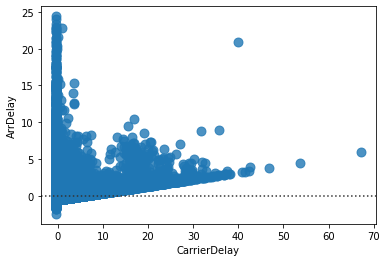

In [110]:
sns.residplot(y=delayed_flights.ArrDelay, x=delayed_flights.CarrierDelay,
              scatter_kws={"s": 80})

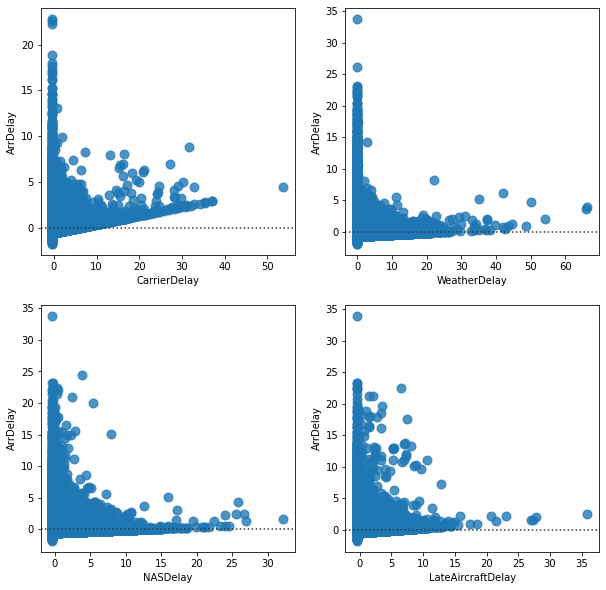

In [113]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

count=0
for i in range(0, 2):
    sns.residplot(y=sample.ArrDelay, x=sample[multiple_reg_vars[i+count]], ax=axs[i, 0],
              scatter_kws={"s": 80})
    count+=1
    sns.residplot(y=sample.ArrDelay, x=sample[multiple_reg_vars[i+count]], ax=axs[i, 1],
              scatter_kws={"s": 80})

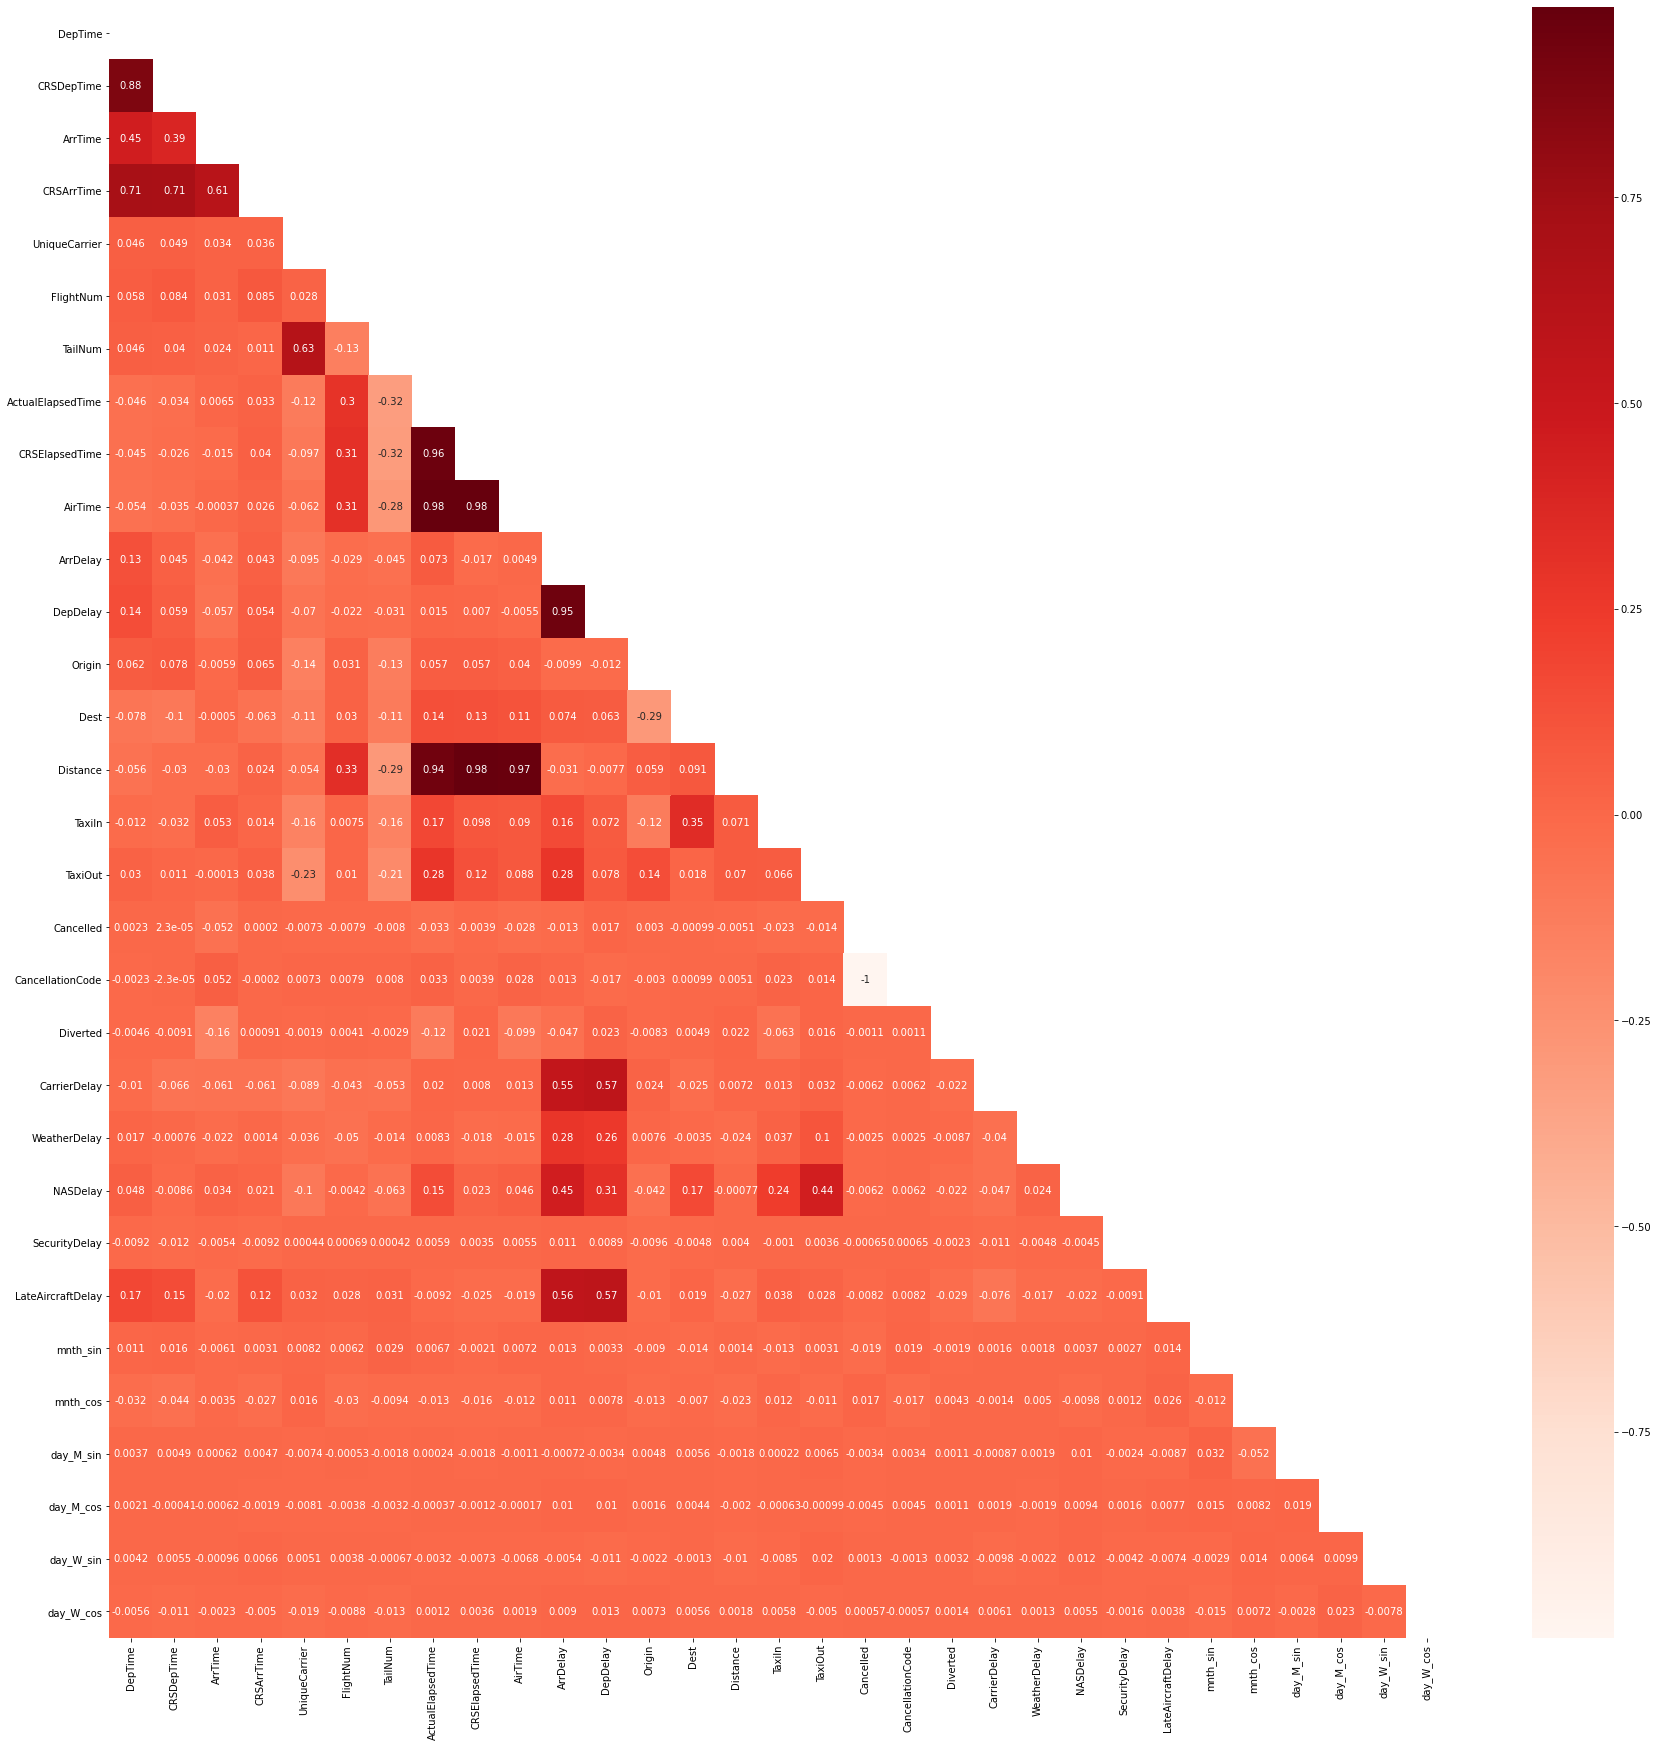

In [97]:
matrix = np.triu(delayed_flights.corr())
plt.figure(figsize=(30,30))
fig = sns.heatmap(delayed_flights.corr(), annot=True, cmap='Reds', mask=matrix)